In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret

In [ ]:

import pandas as pd

with dvc.api.open(repo="https://github.com/Rushi-101/MLOps_Assignment", path="data/creditcard.csv", mode="r") as fd:
  df = pandas.read_csv(fd)


In [ ]:
data_unseen = df.sample(frac=0.1, random_state=42)      # Sample 10% of the data to become the unseen test set
df = df.drop(data_unseen.index)                       # Use the remaining 90% as the training (& validation) data

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (256326, 31)
Unseen Data For Predictions: (28481, 31)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [ ]:
from pycaret.classification import *

In [ ]:
expt_basic = setup(
    data = df, 
    target = 'Class', 
    session_id=42,                      # Random seed to ensure reproducibility of the experiment with the same data
    train_size=0.8,                     # 80% training data & 20% held-out validation data
    normalize = True,
    normalize_method="minmax",
    numeric_imputation="median",        # "mean" by default
    categorical_imputation="mode",      # "constant" (not_available) by default
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
best = compare_models(sort="F1", exclude=["et", "ada", "gbc", "qda","nb","lightgbm","ridge"], fold=5, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9371,0.7647,0.9355,0.8401,0.8398,0.8448,96.158
knn,K Neighbors Classifier,0.9994,0.9063,0.7335,0.9123,0.8125,0.8122,0.8174,104.276
lda,Linear Discriminant Analysis,0.9993,0.8964,0.7447,0.8552,0.7939,0.7936,0.7966,1.018
dt,Decision Tree Classifier,0.9991,0.8566,0.7137,0.7312,0.7220,0.7215,0.7217,9.148
lr,Logistic Regression,0.9990,0.9766,0.5151,0.8517,0.6402,0.6397,0.6610,1.982
svm,SVM - Linear Kernel,0.9989,0.0000,0.4559,0.8428,0.5912,0.5907,0.6191,0.360


In [ ]:
for model in best:
    print(model)
    print()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max

In [ ]:
rf = best[0]
rf = tune_model(rf, fold=5, optimize="F1")

In [ ]:
knn = best[1]
knn = tune_model(knn, fold=10, optimize="F1")

In [ ]:
lda = best[2]
lda = tune_model(lda, fold=5, optimize="F1")

In [ ]:
dt = best[3]
dt = tune_model(dt, fold=5, optimize="F1")

In [ ]:
lr = best[4]
lr = tune_model(lr, fold=5, optimize="F1")

In [ ]:
save_model(rf,'/content/drive/MyDrive/MLOps_Week3/models/rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_

In [ ]:
save_model(knn,'/content/drive/MyDrive/MLOps_Week3/models/knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('fix_perfect', Remove_100(target='Class')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
         

In [ ]:
save_model(lda,'/content/drive/MyDrive/MLOps_Week3/models/lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('dummy', Dummify(target='Class')),
                 ('fix_perfect', Remove_100(target='Class')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('df

In [ ]:
save_model(dt,'/content/drive/MyDrive/MLOps_Week3/models/dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                       

In [ ]:
save_model(lr,'/content/drive/MyDrive/MLOps_Week3/models/lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                

In [ ]:
print(rf, "\n")
print(knn, "\n")
print(lda, "\n")
print(dt, "\n")
print(lr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform') 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, 

In [ ]:
blended_model = blend_models(estimator_list=[rf, knn, lda, dt, lr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9851,0.4857,0.9444,0.6415,0.6411,0.6769
1,0.9996,0.9753,0.7429,1.0000,0.8525,0.8522,0.8617
2,0.9996,0.9807,0.8286,0.9355,0.8788,0.8786,0.8802
3,0.9994,0.9540,0.7714,0.8438,0.8060,0.8057,0.8065
4,0.9996,0.9701,0.8000,0.9333,0.8615,0.8613,0.8639
5,0.9995,0.9683,0.7143,1.0000,0.8333,0.8331,0.8449
6,0.9998,0.9944,0.8857,1.0000,0.9394,0.9393,0.9410
7,0.9995,0.9877,0.7778,0.9333,0.8485,0.8482,0.8518
8,0.9995,0.9662,0.7500,0.9310,0.8308,0.8305,0.8354
9,0.9997,0.9843,0.8333,1.0000,0.9091,0.9089,0.9127


In [ ]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9995,0.979,0.7419,0.9718,0.8415,0.8412,0.8489


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,0.419140,0.976197,0.762661,0.936402,0.279181,0.758575,0.262333,0.260717,0.793060,0.591930,0.620637,0.353227,0.677384,0.202719,0.675491,0.424058,0.465791,0.714293,0.691043,0.516386,0.577630,0.565817,0.538137,0.664813,0.408336,0.586449,0.509990,0.237936,0.313313,0.001627,0,0,0.9998
1,0.435645,0.975573,0.765967,0.934395,0.304752,0.761292,0.262694,0.262987,0.791850,0.572239,0.621970,0.366098,0.706619,0.303327,0.672115,0.399509,0.459156,0.711274,0.671345,0.509680,0.578303,0.563670,0.521142,0.665268,0.404540,0.593651,0.366363,0.239128,0.313599,0.001978,0,0,0.9998
2,0.843957,0.967989,0.776879,0.894800,0.228826,0.772153,0.267618,0.261399,0.760404,0.542926,0.585425,0.312970,0.746720,0.492396,0.631142,0.269036,0.481680,0.718691,0.676261,0.561598,0.586555,0.535064,0.478004,0.666710,0.350242,0.610515,0.461251,0.236777,0.315363,0.000139,0,0,0.9999
3,0.331248,0.945385,0.772838,0.948326,0.205031,0.766867,0.272559,0.267685,0.792747,0.552622,0.604686,0.290382,0.679554,0.347102,0.659236,0.408387,0.474226,0.699402,0.683071,0.615140,0.579907,0.559011,0.480772,0.662025,0.200029,0.574769,0.574280,0.235096,0.313561,0.002500,0,0,0.9999
4,0.165858,0.949159,0.772161,0.951065,0.266167,0.756842,0.268576,0.270933,0.789076,0.560540,0.606619,0.267643,0.690770,0.430508,0.646021,0.473437,0.452075,0.719794,0.645976,0.567440,0.580451,0.563924,0.532080,0.668224,0.396676,0.529567,0.491876,0.241231,0.315391,0.008635,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,0.314418,0.941391,0.797672,0.864370,0.313693,0.767371,0.249164,0.265545,0.798625,0.562780,0.615562,0.439400,0.717586,0.406996,0.546117,0.385349,0.475097,0.818365,0.758523,0.509896,0.584333,0.559046,0.510189,0.669348,0.361894,0.556757,0.354909,0.237987,0.305240,0.000035,0,0,0.9992
51262,0.338864,0.925785,0.756820,0.920561,0.233594,0.737247,0.293609,0.285936,0.792515,0.573367,0.575446,0.335844,0.724677,0.376458,0.644785,0.258019,0.455925,0.728119,0.608403,0.511191,0.577740,0.561447,0.523679,0.683179,0.351354,0.525621,0.539714,0.245971,0.309854,0.037189,0,0,0.9999
51263,0.189366,0.966064,0.751764,0.923039,0.275597,0.762410,0.276241,0.263753,0.791716,0.583994,0.610472,0.299267,0.747045,0.542663,0.637274,0.355113,0.469772,0.697057,0.685551,0.569967,0.588628,0.566781,0.522871,0.657148,0.215754,0.594436,0.527552,0.237156,0.314461,0.015451,0,0,0.9999
51264,0.714229,0.989025,0.759873,0.892715,0.247442,0.768947,0.273566,0.263351,0.793093,0.607720,0.613196,0.321581,0.729263,0.345819,0.665936,0.333696,0.419422,0.731414,0.574943,0.548076,0.577365,0.560583,0.509638,0.668033,0.160283,0.561850,0.428965,0.238455,0.311579,0.002335,0,0,0.9999


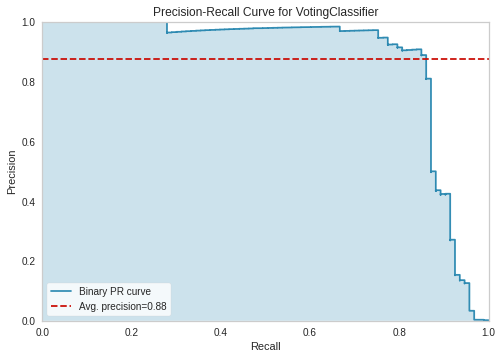

In [ ]:
plot_model(blended_model, plot="pr")

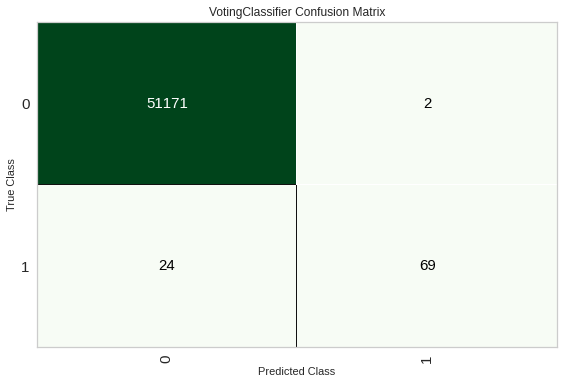

In [ ]:
plot_model(blended_model, plot="confusion_matrix")

In [ ]:
unseen_predictions = predict_model(blended_model, data=data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1,0.9918
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,0,0.9999
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,0,0.9999
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0,0.9999
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0,0.9999


In [ ]:
from pycaret.utils import check_metric
print("Accuracy:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Accuracy'))
print("Precision:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Precision'))
print("Recall:\t", check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Recall'))
print("F1:\t", np.round(np.sqrt(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'F1')), 4))


Accuracy:	 0.9996
Precision:	 1.0
Recall:	 0.7391
F1:	 0.922


In [ ]:
save_model(blended_model, "/content/drive/MyDrive/MLOps_Week3/models/blended")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                                                       splitter='best')),
                                               ('lr',
                                                LogisticRegression(C=1.0,
                                                       